In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [7]:
df=pd.read_csv("train_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

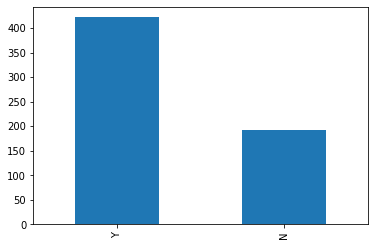

In [15]:
df['Loan_Status'].value_counts().plot.bar()

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [18]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df=df.drop('Loan_ID',axis=1)

In [53]:
df['Gender'].replace('Female',0, inplace=True)
df['Gender'].replace('Male',1, inplace=True)
df['Married'].replace('No',0, inplace=True)
df['Married'].replace('Yes',1, inplace=True)
df['Property_Area'].replace('Urban',1, inplace=True)
df['Property_Area'].replace('Semiurban',0, inplace=True)
df['Property_Area'].replace('Rural',-1, inplace=True)
df['Education'].replace('Graduate',1, inplace=True)
df['Education'].replace('Not Graduate',0, inplace=True)
df['Self_Employed'].replace('Yes',1, inplace=True)
df['Self_Employed'].replace('No',0, inplace=True)
df['Dependents'].replace('0',0, inplace=True)
df['Dependents'].replace('1',1, inplace=True)
df['Dependents'].replace('2',2, inplace=True)
df['Dependents'].replace('3+',3, inplace=True)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [54]:
X

array([[  1.,   0.,   0., ..., 360.,   1.,   1.],
       [  1.,   1.,   1., ..., 360.,   1.,  -1.],
       [  1.,   1.,   0., ..., 360.,   1.,   1.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   1.],
       [  1.,   1.,   2., ..., 360.,   1.,   1.],
       [  0.,   0.,   0., ..., 360.,   0.,   0.]])

In [55]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
model.predict(X_test)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [51]:
model.score(X_test,y_test)

0.8373983739837398

In [60]:
a=float(input("Enter the gender of the applicant(male-1,female-0):"))
b=float(input("Enter the Marital status of the applicant(married-1,unmarried-0):"))
c=float(input("Enter the number of dependents on the applicant:"))
d=float(input("Enter the educational qualification of the applicant(Graduate-1,Not Graduate-0):"))
e=float(input("Enter whether the applicant is self employed or not(yes-1,no-0):"))
f=float(input("Enter the applicant's income:"))
g=float(input("Enter co-applicant's income"))
h=float(input("Enter the loan amount:"))
i=float(input("Enter the loan amount term:"))
j=float(input("Enter the credit history:"))
k=float(input("Enter the property area of the applicant(urban=1, semi urban=0, rural=-1):"))
x=np.array([[a,b,c,d,e,f,g,h,i,j,k]])
model.predict(x)

Enter the gender of the applicant(male-1,female-0):1
Enter the Marital status of the applicant(married-1,unmarried-0):1
Enter the number of dependents on the applicant:1
Enter the educational qualification of the applicant(Graduate-1,Not Graduate-0):1
Enter whether the applicant is self employed or not(yes-1,no-0):0
Enter the applicant's income:4583
Enter co-applicant's income1508
Enter the loan amount:128
Enter the loan amount term:360
Enter the credit history:1
Enter the property area of the applicant(urban=1, semi urban=0, rural=-1):-1


array(['Y'], dtype=object)